In [ ]:
### 환경설정 및 데이터 다운로드
!git clone https://github.com/simsimee/HKNU_lecture.git
!pip install matplotlib pandas seaborn scikit-learn numpy
!pip install koreanize-matplotlib

# 데이터 분석 및 모델 학습

## 📊 데이터 설명

### 🛍️ 이커머스 사용자 개인화 데이터셋

**🎯 데이터셋 목적:**
- 고객의 개인화된 쇼핑 경험 제공
- 마케팅 전략 수립 및 타겟팅
- 고객 행동 패턴 분석 및 예측

### 📋 변수 설명 (User Attributes Overview)

#### 👤 **사용자 기본 정보**
1. **User_ID**: 각 사용자의 고유 식별자
2. **Age**: 사용자의 나이
3. **Gender**: 사용자의 성별
4. **Location**: 사용자의 거주 지역

#### 💰 **경제적 특성**
5. **Income**: 사용자의 소득 수준
6. **Total_Spending**: 누적 총 지출액
7. **Average_Order_Value**: 평균 주문 금액

#### 🛒 **구매 행동 패턴**
8. **Purchase_Frequency**: 구매 빈도
9. **Product_Category_Preference**: 선호 제품 카테고리

#### 🌐 **온라인 활동 패턴**
10. **Last_Login_Days_Ago**: 마지막 로그인 이후 경과 일수
11. **Time_Spent_on_Site_Minutes**: 사이트 체류 시간
12. **Pages_Viewed**: 방문 페이지 수

#### 📧 **마케팅 수용성**
13. **Interests**: 관심 분야 (스포츠, 패션, 기술 등)
14. **Newsletter_Subscription**: 뉴스레터 구독 여부

| 활용 분야 | 구체적 방법 | 기대 효과 |
|-----------|-------------|-----------|
| **개인화 추천** | 구매 이력 + 관심사 기반 상품 추천 | 구매 전환율 증가 |
| **타겟 마케팅** | 인구통계학적 특성별 캠페인 설계 | 마케팅 ROI 향상 |
| **고객 세분화** | 구매 패턴 기반 고객 등급 분류 | 맞춤형 서비스 제공 |
| **이탈 방지** | 로그인 주기 + 구매 빈도 분석 | 고객 유지율 개선 |
| **프로모션 최적화** | 소득 + 평균 주문액 기반 할인 전략 | 매출 극대화 |

### 🔍 분석 목표
이 데이터셋을 통해 고객의 **뉴스레터 구독 여부**를 예측하는 분류 모델을 구축

## 🔧 환경 설정 및 라이브러리 Import

**📦 사용하는 주요 라이브러리:**
- **pandas**: 데이터 조작 및 분석
- **numpy**: 수치 연산
- **matplotlib & seaborn**: 데이터 시각화
- **sklearn**: 머신러닝 모델 및 전처리
- **warnings**: 경고 메시지 필터링

**⚙️ 설정 내용:**
- 한글 폰트 설정 (NanumGothic)
- 시각화 테마 및 스타일 설정
- 경고 메시지 무시 설정
- 랜덤 시드 고정 (재현 가능한 결과)


In [1]:
# === Setup
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

warnings.simplefilter('ignore', category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)

RANDOM_STATE = 42
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", None)


## 📊 데이터 로드 및 기본 정보 확인

**📁 데이터 로드:**
- CSV 파일에서 데이터 불러오기

**🔍 데이터 기본 정보:**
- **총 데이터 개수**: 1,000개 (완전한 데이터, 결측값 없음)
- **변수 개수**: 14개 (숫자형 8개, 범주형 5개, 불린형 1개)


In [2]:
df = pd.read_csv("/content/HKNU_lecture/data/user_personalized_features.csv", index_col='Unnamed: 0')
df.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   User_ID                      1000 non-null   object
 1   Age                          1000 non-null   int64 
 2   Gender                       1000 non-null   object
 3   Location                     1000 non-null   object
 4   Income                       1000 non-null   int64 
 5   Interests                    1000 non-null   object
 6   Last_Login_Days_Ago          1000 non-null   int64 
 7   Purchase_Frequency           1000 non-null   int64 
 8   Average_Order_Value          1000 non-null   int64 
 9   Total_Spending               1000 non-null   int64 
 10  Product_Category_Preference  1000 non-null   object
 11  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 12  Pages_Viewed                 1000 non-null   int64 
 13  Newsletter_Subscription      1000 non-n

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,40.986,13.497852,18.0,29.00,42.0,52.00,64.0
Income,1000.0,81304.732,37363.972753,20155.0,48715.50,81042.0,112694.50,149951.0
Last_Login_Days_Ago,1000.0,15.586,8.205604,1.0,8.00,16.0,23.00,29.0
Purchase_Frequency,1000.0,4.631,2.837762,0.0,2.00,5.0,7.00,9.0
Average_Order_Value,1000.0,104.039,54.873569,10.0,58.00,105.0,150.00,199.0
Total_Spending,1000.0,2552.957,1420.985048,112.0,1271.75,2542.0,3835.50,4999.0
Time_Spent_on_Site_Minutes,1000.0,297.360,175.596123,2.0,144.00,292.5,449.25,599.0
Pages_Viewed,1000.0,24.403,14.020170,1.0,12.00,24.5,36.00,49.0


## 📈 1단계: 변수(Total Spending) 분포 분석

### 🎯 분석 목적
- **Total_Spending**은 고객이 사용한 금액을 나타내는 컬럼
- 분포의 형태를 파악하여 데이터의 특성 이해
- 이상값(outlier) 존재 여부 확인

### 📊 시각화 내용
1. **히스토그램 + KDE 곡선**:
   - 전체적인 분포 형태 파악
   - 정규분포인지, 치우친 분포인지 확인
   
2. **박스플롯(Box Plot)**:
   - 중앙값, 사분위수 확인
   - 이상값 식별
   - 데이터 변동성 파악

### 💡 해석 포인트
- **분포의 모양**: 한쪽으로 치우친 분포인지 확인
- **중심 경향**: 평균과 중앙값의 차이
- **변동성**: 데이터가 얼마나 퍼져있는지
- **이상값**: 극단적으로 높은 지출을 보이는 고객 존재 여부


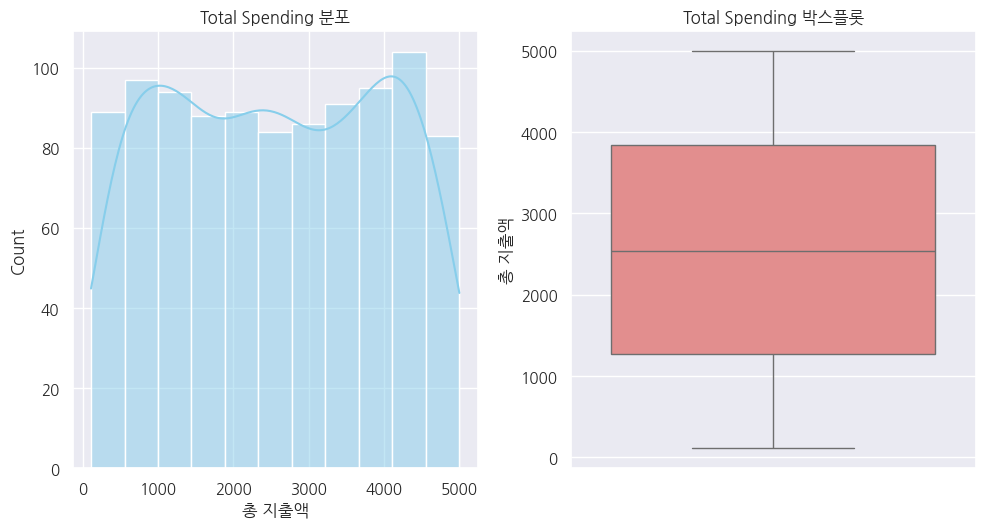

In [6]:
# 1. 타겟 변수 분포 분석

#한글이 보이도록 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
sns.set(font=font_prop.get_name())

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Total_Spending'], kde=True, color='skyblue')
plt.title('Total Spending 분포')
plt.xlabel('총 지출액')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Total_Spending'], color='lightcoral')
plt.title('Total Spending 박스플롯')
plt.ylabel('총 지출액')

plt.tight_layout()
plt.show()

## 🔍 2단계: 범주형 변수별 Total Spending 분포 분석

### 🎯 분석 목적
- 범주형 변수(성별, 지역, 관심사)에 따른 구매 패턴 차이 분석
- 각 그룹 간 구매 금액의 통계적 차이 확인

### 📊 분석 변수들

#### 1. **성별(Gender)별 Total Spending**
- 남성과 여성 간 구매 패턴 차이

#### 2. **지역(Location)별 Total Spending**  
- 도시, 교외, 농촌 지역별 소비 수준

#### 3. **관심사(Interests)별 Total Spending**
- 스포츠, 패션, 기술 분야별 구매력 차이

#### 4. **뉴스레터 구독(Newsletter Subscription)별 Total Spending**
- 구독자와 비구독자 간 구매 행동 차이

### 💡 해석 가이드
- **박스플롯 읽는 법**:
  - 상자: 25%~75% 구간 (IQR)
  - 중앙선: 중앙값(median)
  - 수염: 최솟값, 최댓값 (이상값 제외)
  - 점: 이상값(outliers)

### 🎯 기대 인사이트
- 어떤 그룹이 더 높은 구매력을 보이는가?

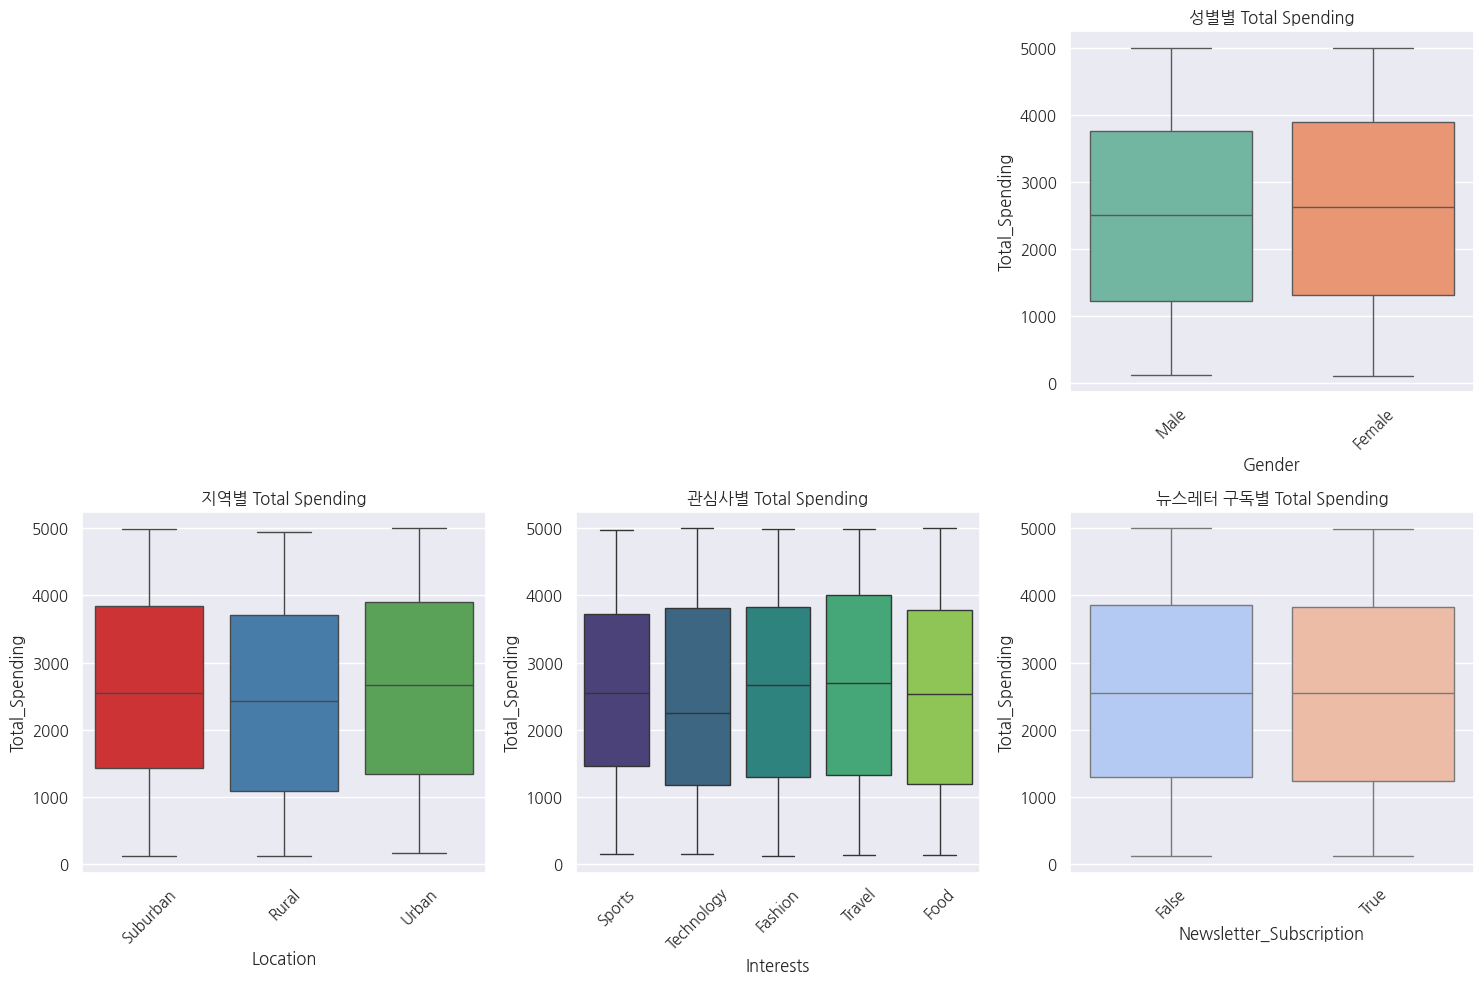

In [7]:
plt.figure(figsize=(15, 10))

# 2. 범주형 변수별 타겟 변수 분포
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Gender', y='Total_Spending', palette='Set2')
plt.title('성별별 Total Spending')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Location', y='Total_Spending', palette='Set1')
plt.title('지역별 Total Spending')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Interests', y='Total_Spending', palette='viridis')
plt.title('관심사별 Total Spending')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Newsletter_Subscription', y='Total_Spending', palette='coolwarm')
plt.title('뉴스레터 구독별 Total Spending')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 🔗 3단계: 수치형 변수 간 상관관계 분석

### 🎯 분석 목적
- 수치형 변수들 간의 선형 관계 강도 측정

### 📊 상관관계 히트맵(Correlation Heatmap)

**🌡️ 히트맵 해석 가이드:**
- **색상**: 빨간색(양의 상관관계) ↔ 파란색(음의 상관관계)
- **수치 범위**: -1 (완전한 음의 상관) ~ +1 (완전한 양의 상관)
- **0에 가까울수록**: 상관관계가 약함

### 🔍 주요 확인 포인트

#### 💰 **경제적 변수들 간 관계**
- **Income vs Total_Spending**: 소득이 높을수록 구매 금액도 높은가?
- **Average_Order_Value vs Total_Spending**: 건당 주문 금액과 총 구매 금액의 관계
- **Purchase_Frequency vs Total_Spending**: 구매 빈도와 총 구매 금액의 관계

#### 🌐 **온라인 행동 변수들 간 관계**
- **Time_Spent_on_Site vs Pages_Viewed**: 사이트 체류 시간과 페이지 조회수
- **Last_Login_Days_Ago vs Purchase_Frequency**: 로그인 주기와 구매 빈도

#### ⚠️ **다중공선성 주의사항**
- **0.8 이상**: 매우 강한 상관관계 (주의 필요)
- **0.6~0.8**: 강한 상관관계
- **0.3~0.6**: 중간 정도 상관관계
- **0.3 미만**: 약한 상관관계


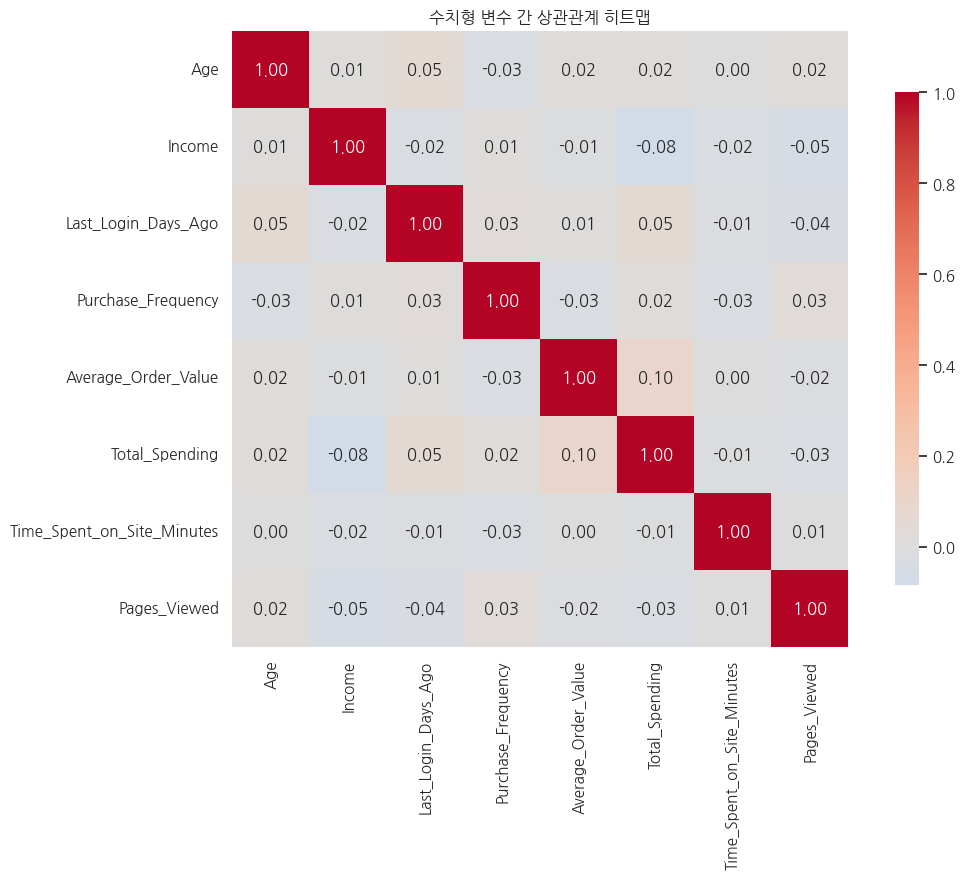

In [8]:
# 3. 수치형 변수 간 상관관계 분석
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('수치형 변수 간 상관관계 히트맵')
plt.show()


## 📈 4단계: 주요 변수 간 산점도 분석

### 🎯 분석 목적
- 핵심 예측 변수들과 타겟 변수(Total_Spending) 간의 **선형 관계** 시각적 확인
- **회귀 분석**을 위한 변수 선택의 근거 마련

### 📊 분석 대상 변수들

#### 1. **소득(Income) vs 총 지출액(Total_Spending)**
- **가설**: 소득이 높을수록 더 많은 금액을 지출할 것

#### 2. **평균 주문금액(Average_Order_Value) vs 총 지출액(Total_Spending)**
- **가설**: 건당 주문 금액이 클수록 총 지출액도 클 것

#### 3. **구매 빈도(Purchase_Frequency) vs 총 지출액(Total_Spending)**
- **가설**: 자주 구매하는 고객일수록 총 지출액이 클 것

### 🔍 산점도 해석 가이드

**📌 패턴 확인사항:**
- **선형성**: 점들이 직선을 따라 분포하는가?
- **이상값**: 패턴에서 크게 벗어나는 점들이 있는가?
- **분산**: 데이터가 얼마나 흩어져 있는가?
- **관계의 강도**: 점들이 얼마나 밀집되어 있는가?

**💡 해석 기준:**
- **강한 선형 관계**: 점들이 직선 근처에 밀집
- **약한 선형 관계**: 점들이 넓게 분산
- **비선형 관계**: 곡선 패턴 형성
- **관계 없음**: 점들이 무작위로 분포

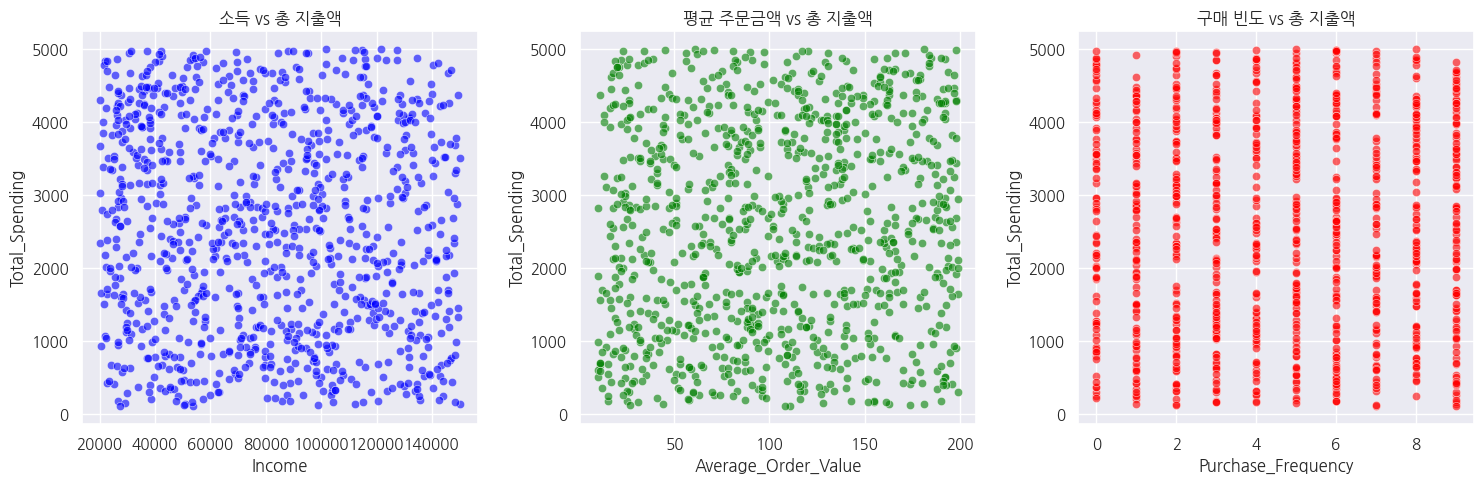

In [9]:
# 4. 주요 변수 간 산점도
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Income', y='Total_Spending', alpha=0.6, color='blue')
plt.title('소득 vs 총 지출액')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Average_Order_Value', y='Total_Spending', alpha=0.6, color='green')
plt.title('평균 주문금액 vs 총 지출액')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Purchase_Frequency', y='Total_Spending', alpha=0.6, color='red')
plt.title('구매 빈도 vs 총 지출액')

plt.tight_layout()
plt.show()

## 📊 5단계: 범주형 변수 분포 분석

### 📈 분석 대상 변수들

#### 👥 **1. 성별(Gender) 분포**
- **목적**: 성별 균형 확인
- **중요성**: 성별 편향이 심할 경우 모델 성능에 영향

#### 🏘️ **2. 지역(Location) 분포**
- **목적**: 지역별 고객 구성 파악
- **카테고리**: Urban(도시), Suburban(교외), Rural(농촌)

#### 🎨 **3. 관심사(Interests) 분포**
- **목적**: 고객의 관심 분야 분포 확인
- **카테고리**: Sports(스포츠), Fashion(패션), Technology(기술)

#### 🛒 **4. 선호 제품 카테고리(Product_Category_Preference) 분포**
- **목적**: 제품 카테고리별 선호도 파악
- **활용**: 재고 관리 및 상품 기획 전략

#### 📧 **5. 뉴스레터 구독(Newsletter_Subscription) 분포**
- **목적**: 마케팅 수용성 측정
- **중요성**: **타겟 변수**로 활용 예정

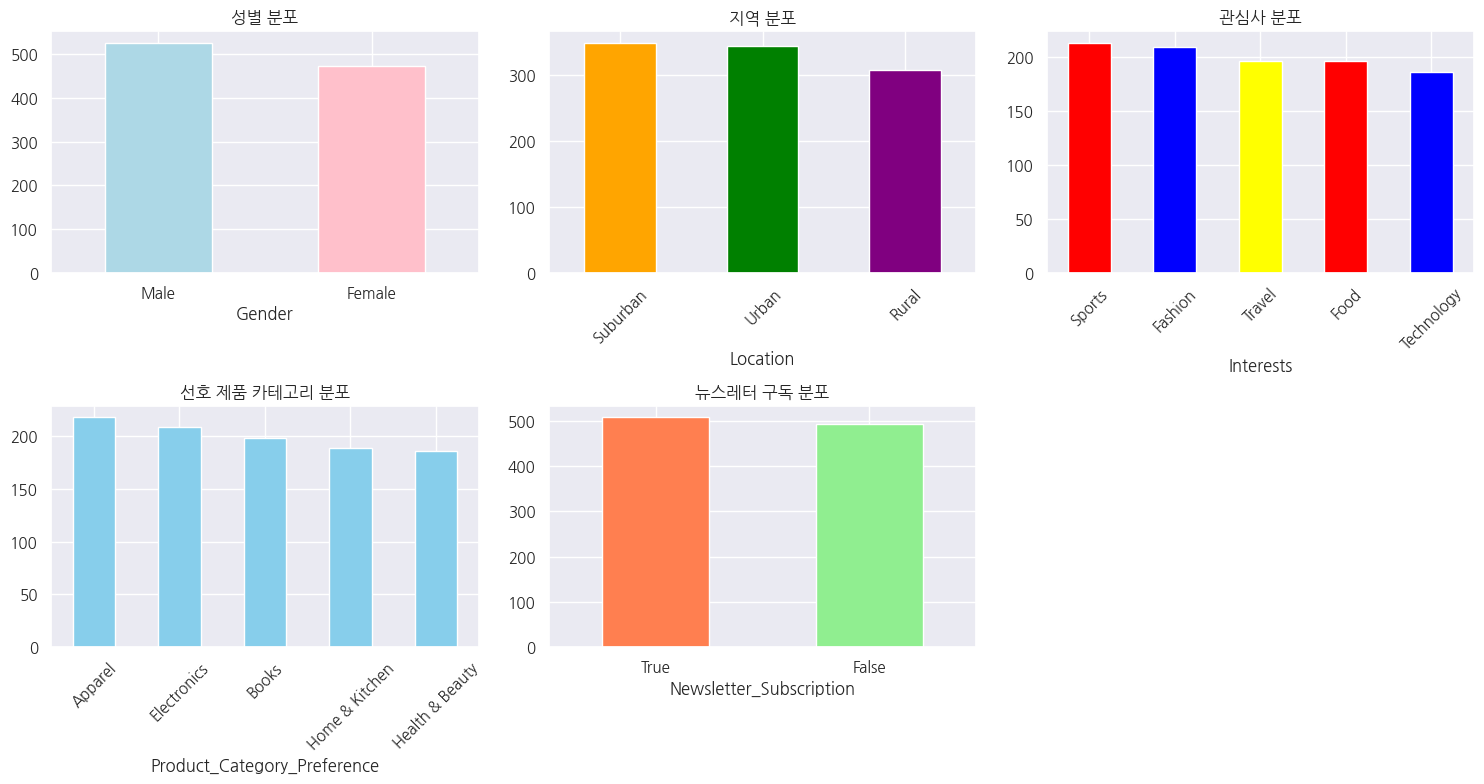

In [10]:
# 5. 범주형 변수 분포
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('성별 분포')
plt.xticks(rotation=0)

plt.subplot(2, 3, 2)
df['Location'].value_counts().plot(kind='bar', color=['orange', 'green', 'purple'])
plt.title('지역 분포')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
df['Interests'].value_counts().plot(kind='bar', color=['red', 'blue', 'yellow'])
plt.title('관심사 분포')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
df['Product_Category_Preference'].value_counts().plot(kind='bar', color='skyblue')
plt.title('선호 제품 카테고리 분포')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
df['Newsletter_Subscription'].value_counts().plot(kind='bar', color=['coral', 'lightgreen'])
plt.title('뉴스레터 구독 분포')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 🤖 6단계: 머신러닝 모델링 - 특성 변수와 타겟 변수 분리

### 🎯 모델링 목표
**뉴스레터 구독 여부 예측 모델** 구축

### 📊 변수 선택 전략

#### 🔍 **특성 변수(Features) 선택**
**수치형 변수만 우선 선택하는 이유:**
- 첫 번째 모델링에서는 **단순성**을 위해 수치형 변수만 사용
- 범주형 변수의 전처리 없이 **빠른 프로토타입** 구축

#### 🎯 **타겟 변수(Target)**
- **Newsletter_Subscription**: 뉴스레터 구독 여부 (True/False)
- **분류 문제**: 이진 분류 (Binary Classification)

### 🔍 가설 설정
**"어떤 고객이 뉴스레터를 구독할 가능성이 높은가?"**


----
## 🔀 데이터 분할 (Train-Test Split)

### 🎯 분할 목적
- **모델 성능의 객관적 평가**를 위한 독립적인 테스트 데이터 확보
- **과적합(Overfitting) 방지** 및 일반화 성능 측정
- **실제 운영 환경 시뮬레이션**

### 📊 분할 전략
- **학습 데이터 (Training Set)**: 80% (800개)
  - 모델 학습 및 패턴 찾기에 사용
  - 충분한 데이터량으로 안정적인 학습 보장
  
- **테스트 데이터 (Test Set)**: 20% (200개)
  - 모델 성능 평가에만 사용
  - 학습에 사용되지 않은 독립적인 데이터

### ⚙️ 핵심 설정
- **random_state=42**: 재현 가능한 결과를 위한 시드 고정
- **stratify 미사용**: 단순 무작위 분할 (첫 번째 시도)

### 🔍 분할 후 확인사항
✅ **학습 데이터**: 800개 (전체의 80%)  
✅ **테스트 데이터**: 200개 (전체의 20%)  
✅ **적절한 비율**: 일반적인 8:2 분할 원칙 준수


In [11]:
x_data = df[['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
         'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = df[['Newsletter_Subscription']]

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.49


## 🎯 모델 학습 및 평가

### 🤖 모델 선택: 로지스틱 회귀(Logistic Regression)
**선택 이유:**
- **이진 분류**에 적합한 알고리즘
- **해석 가능성**이 높음 (어떤 변수가 영향을 미치는지 파악 가능)
- **빠른 학습** 속도
- **선형 관계** 가정 하에서 안정적인 성능

### 📈 성능 결과 분석
#### 🎯 **정확도(Accuracy): 49%**
**⚠️ 성능 해석:**
- **기준선(Baseline)**: 50% (동전 던지기와 유사 / 이진분류)
- **현재 성능**: 49% (기준선보다 낮음)
- **결론**: **모델이 제대로 학습되지 않음**
----

#### 데이터 정제를 통한 재학습 및 성능 비교

In [14]:
df.head(3)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True


In [15]:
df.dtypes

,0
User_ID,object
Age,int64
Gender,object
Location,object
Income,int64
Interests,object
Last_Login_Days_Ago,int64
Purchase_Frequency,int64
Average_Order_Value,int64
Total_Spending,int64


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder on the categorical columns
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Location'] = encoder.fit_transform(df['Location'])
df['Interests'] = encoder.fit_transform(df['Interests'])
df['Product_Category_Preference'] = encoder.fit_transform(df['Product_Category_Preference'])

In [17]:
df.head(3)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,1,1,38037,2,5,7,18,2546,1,584,38,True
1,#2,46,0,0,103986,3,15,7,118,320,2,432,40,False
2,#3,32,0,1,101942,2,28,1,146,3766,0,306,1,True


In [18]:
df.dtypes

,0
User_ID,object
Age,int64
Gender,int64
Location,int64
Income,int64
Interests,int64
Last_Login_Days_Ago,int64
Purchase_Frequency,int64
Average_Order_Value,int64
Total_Spending,int64


In [19]:
x_data = df[['Age', 'Gender', 'Location', 'Income', 'Interests',
             'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
             'Total_Spending', 'Product_Category_Preference',
             'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = df[['Newsletter_Subscription']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.515


## 📊 개선된 모델 성능 분석

### 🎯 **성능 결과: 51.5%**

#### 📈 **성능 개선 분석**
- **이전 모델**: 49.0% (수치형 변수 8개만 사용)
- **개선된 모델**: 51.5% (전체 변수 12개 사용)
- **개선 정도**: +2.5%p (Percentage Point)
- **개선율**: 약 5.1% 향상 ((51.5-49)/49 × 100)


----
## 🎯 추가 개선 방법 및 학습 정리

### 🔧 다양한 데이터 정제 방법들

#### 1. **고급 인코딩 기법**
- **One-Hot Encoding**: 명목형 변수의 정확한 처리
- **Target Encoding**: 타겟 변수와의 관계를 고려한 인코딩
- **Frequency Encoding**: 빈도 기반 인코딩

#### 2. **특성 스케일링**
- **StandardScaler**: 평균 0, 표준편차 1로 정규화
- **MinMaxScaler**: 0~1 범위로 정규화
- **RobustScaler**: 이상값에 강건한 스케일링

#### 3. **특성 선택 및 차원 축소**
- **Univariate Selection**: 통계적 검정을 통한 특성 선택
- **Recursive Feature Elimination**: 재귀적 특성 제거
- **PCA**: 주성분 분석을 통한 차원 축소

#### 4. **고급 모델링 기법**
- **앙상블 방법**: Random Forest, XGBoost, LightGBM
- **신경망**: Deep Learning 모델
- **SVM**: Support Vector Machine

----
### 📚 오늘 학습 내용 정리

#### 🎯 **핵심 학습 목표 달성**
✅ **데이터 분석 프로세스** 이해  
✅ **EDA(탐색적 데이터 분석)** 실습  
✅ **머신러닝 모델링** 경험  
✅ **성능 개선** 과정 체험  
✅ **데이터 분석을 통한 전처리의 중요성**: 간단한 전처리만으로도 49% → 51.5% 성능 개선


# 🔍 모델 성능 비교 프로젝트 (with Google & ChatGPT)

## 📌 목표
- 현재 사용 중인 모델과 다른 모델들을 비교해 **성능 향상 가능성**을 탐색합니다.
- 필요 시 **데이터 정제, 전처리 방법 개선, 모델 교체** 등도 수행합니다.
- 모델은 `sklearn` 라이브러리 내에서 제공되는 것으로 한정합니다.
---

## ✅ 결론 및 선택

- **수정한 방법**
  - 작성
- **모델 성능 측정 결과**
  - 작성
---

## 📚 참고

- `scikit-learn` 공식 문서  
- ChatGPT를 통해 하이퍼파라미터 튜닝 방향 제안  
- 구글 키워드 예시:
  - `best sklearn models for classification`
  - `how to compare sklearn classifiers`
  - `feature engineering classification sklearn`